# Лабораторна робота 4
Пшеничного Ніколи, ДО-3

In [3]:
library(psych)
library(ggplot2)
library(moments)
library(gamlss)
library(goftest)
library(goft)
library(qqplotr)
library(car)
library(corrplot)
library(ggstatsplot)
library(qgraph)
library(modelr)
library(lmtest)
library(ggpubr)
library(emmeans)

In [4]:
data <- read.csv("/Users/nicol/OneDrive/Документы/Я у мамы программист/R/Lab4/CreditScoreClassificationDataset.csv", header = TRUE)


In [5]:
unique_names <- unique(data$Education)
print(unique_names)

[1] "Bachelor's Degree"   "Master's Degree"     "Doctorate"          
[4] "High School Diploma" "Associate's Degree" 


In [6]:
conditions <- c("Bachelor's Degree", "Master's Degree", "Doctorate", "High School Diploma","Associate's Degree")
replacement_values <- c("Bachelor", "Master", "Doc","HDP","AD")
imputed <- data
imputed$Education[imputed$Education == "Bachelor's Degree"] <-"Bachelor"
imputed$Education[imputed$Education == "Master's Degree"] <-"Master"
imputed$Education[imputed$Education == "Doctorate"] <-"Doc"
imputed$Education[imputed$Education == "High School Diploma"] <-"HSD"
imputed$Education[imputed$Education == "Associate's Degree"] <-"AD"


View(imputed)

Age,Gender,Income,Education,Marital.Status,Number.of.Children,Home.Ownership,Credit.Score
<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
25,Female,50000,Bachelor,Single,0,Rented,High
30,Male,100000,Master,Married,2,Owned,High
35,Female,75000,Doc,Married,1,Owned,High
40,Male,125000,HSD,Single,0,Owned,High
45,Female,100000,Bachelor,Married,3,Owned,High
50,Male,150000,Master,Married,0,Owned,High
26,Female,40000,AD,Single,0,Rented,Average
31,Male,60000,Bachelor,Single,0,Rented,Average
36,Female,80000,Master,Married,2,Owned,High


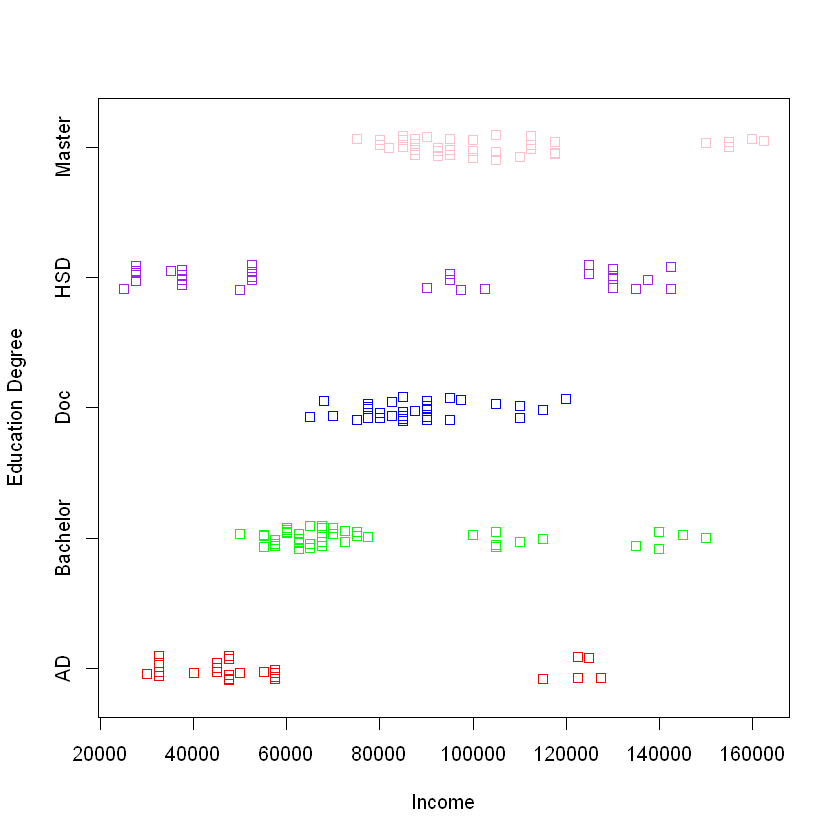

In [7]:
stripchart(Income ~ Education, data = imputed, xlab = "Income",
           ylab = "Education Degree", col = c("red", "green", "blue", "purple", "pink"), method = "jitter", cex = 1)

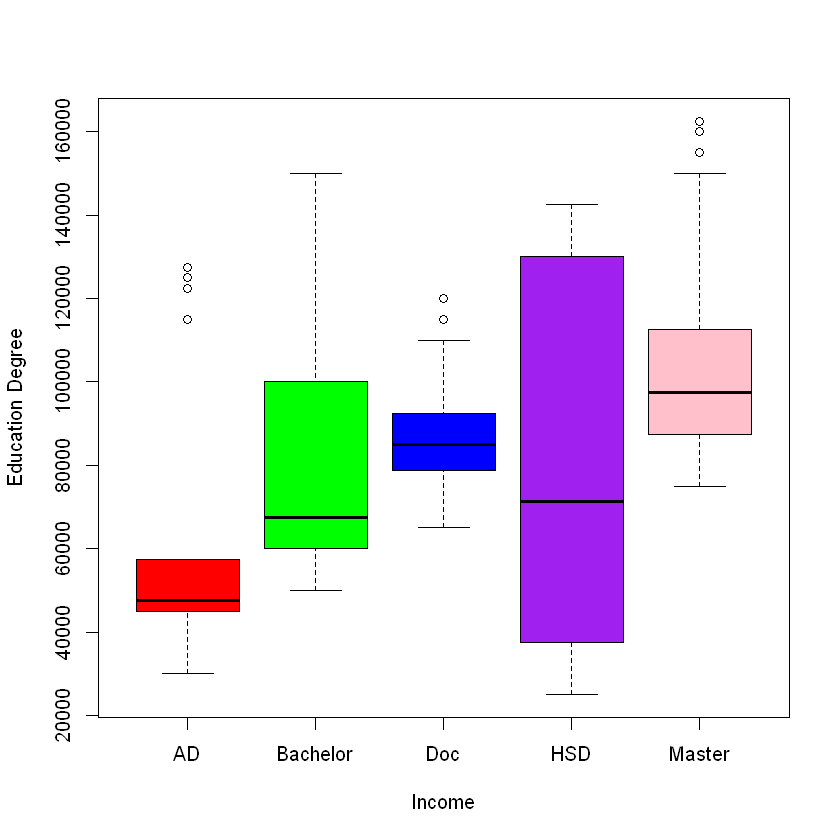

In [8]:
boxplot(Income ~ Education, data = imputed,
        xlab = "Income", ylab = "Education Degree",
        main = "", col = c("red", "green", "blue", "purple", "pink"))

In [9]:
aggregate(x = imputed$Income, by = list(imputed$Education), FUN = mean)


Group.1,x
<chr>,<dbl>
AD,60800.00
Bachelor,79404.76
Doc,87838.71
HSD,79583.33
Master,104777.78


## 2. Перевірити виконання передумов дисперсійного аналізу.

In [10]:
mod1 <- aov(Income ~ Education, data = imputed)

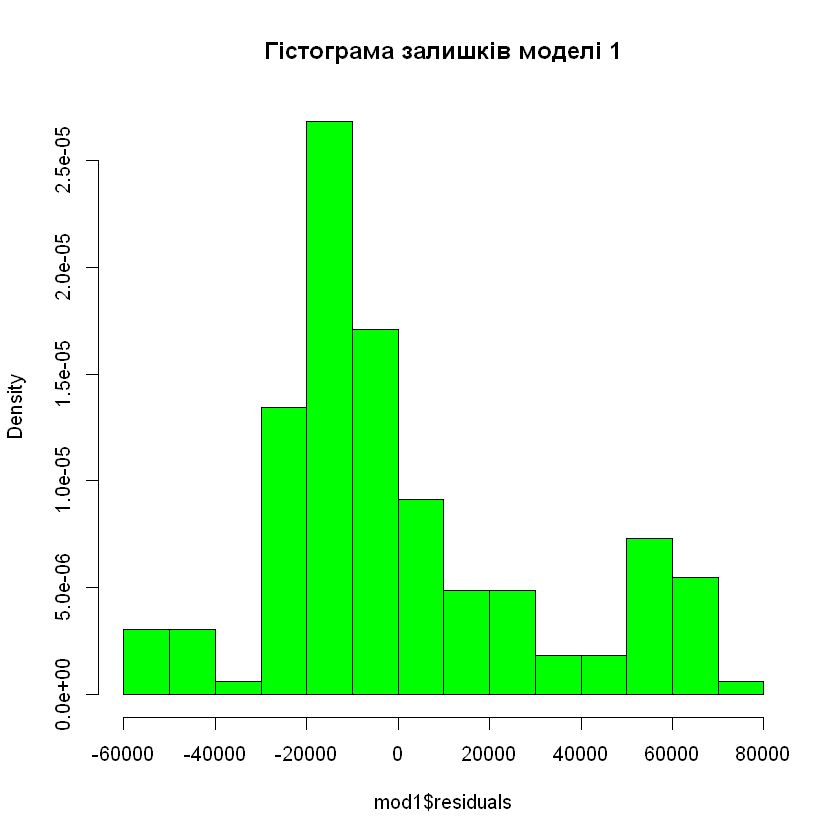

In [11]:
hist(mod1$residuals, main = "Гістограма залишків моделі 1", freq = F, col = "green1")

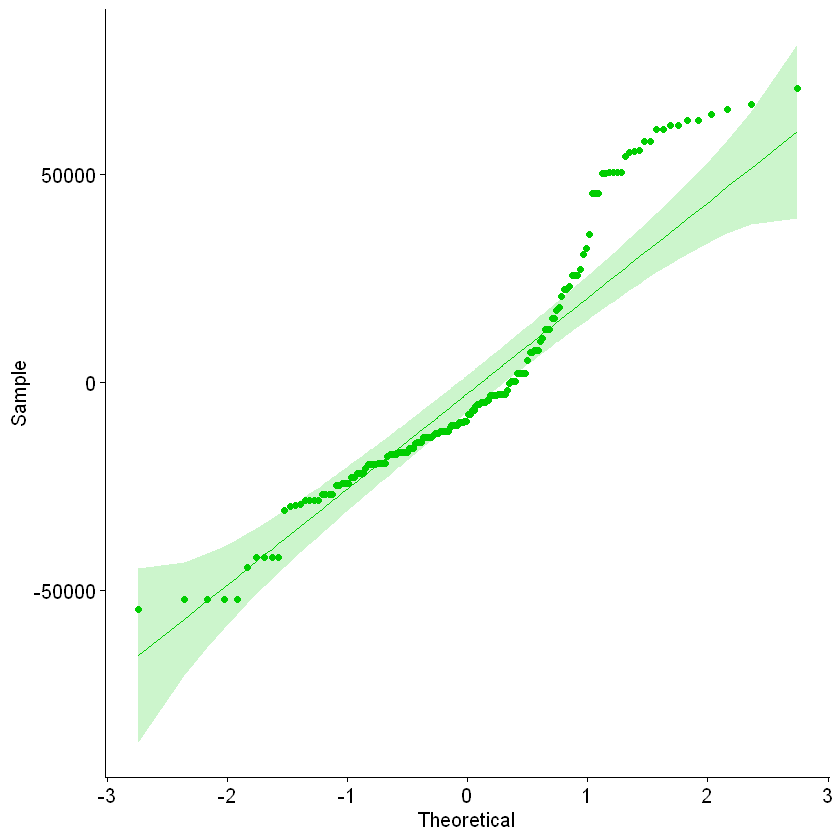

In [12]:
ggqqplot(mod1$residuals, color = "green3")

In [13]:
shapiro.test(mod1$residuals)


	Shapiro-Wilk normality test

data:  mod1$residuals
W = 0.91247, p-value = 2.372e-08


## Перевірка гомогенності дисперсій

Візуально оцінемо дисперсії

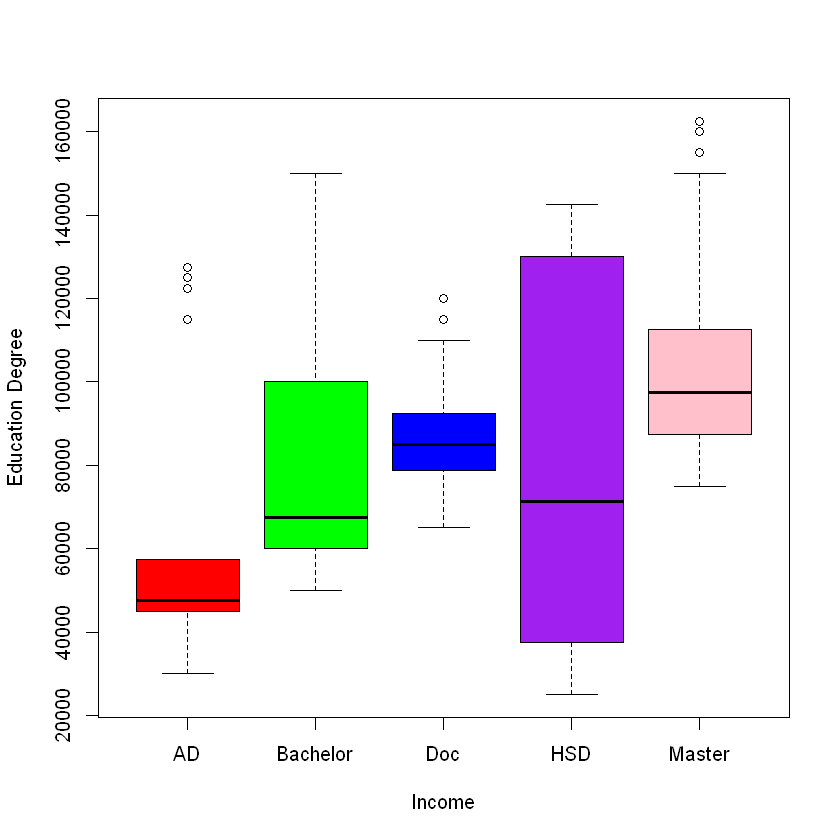

In [14]:
boxplot(Income ~ Education, data = imputed,
        xlab = "Income", ylab = "Education Degree",
        main = "", col = c("red", "green", "blue", "purple", "pink"))

In [15]:
tapply(imputed$Income, imputed$Education, var)

AD   Bachelor        Doc        HSD     Master 
1063916667  804515099  177139785 1957794540  576849206

In [16]:
bartlett.test(imputed$Income ~ imputed$Education)


	Bartlett test of homogeneity of variances

data:  imputed$Income by imputed$Education
Bartlett's K-squared = 39.288, df = 4, p-value = 6.074e-08


Отже, вочевидь наш розподіл не є ні нормальним, ні гомогенним.

## 3. Провести дисперсійний аналіз

In [19]:
mod1 <- aov(Income ~ Education, data = imputed)

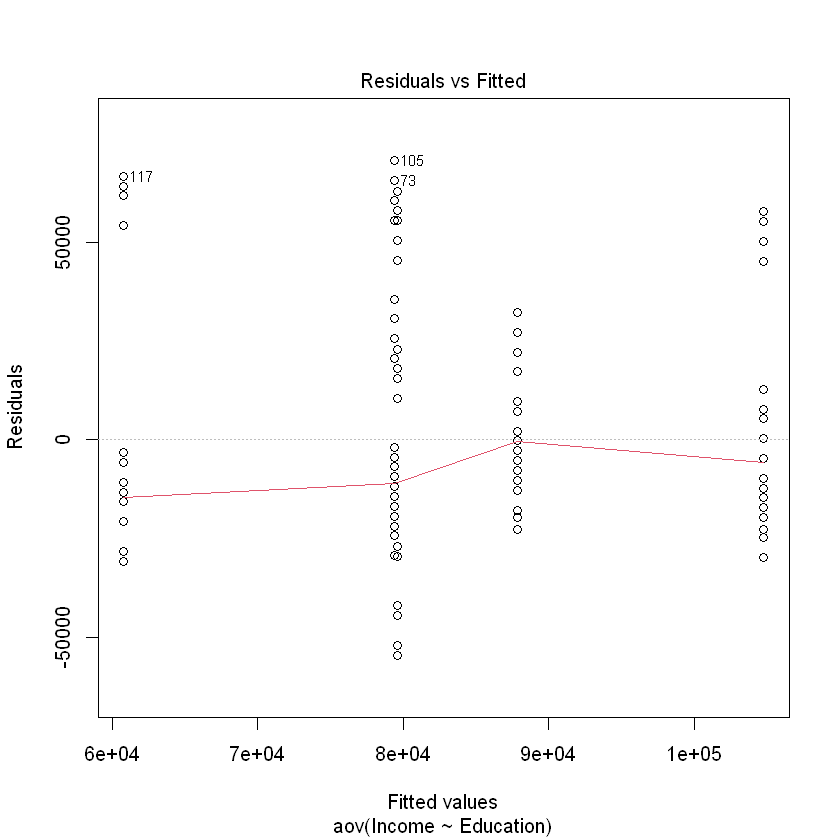

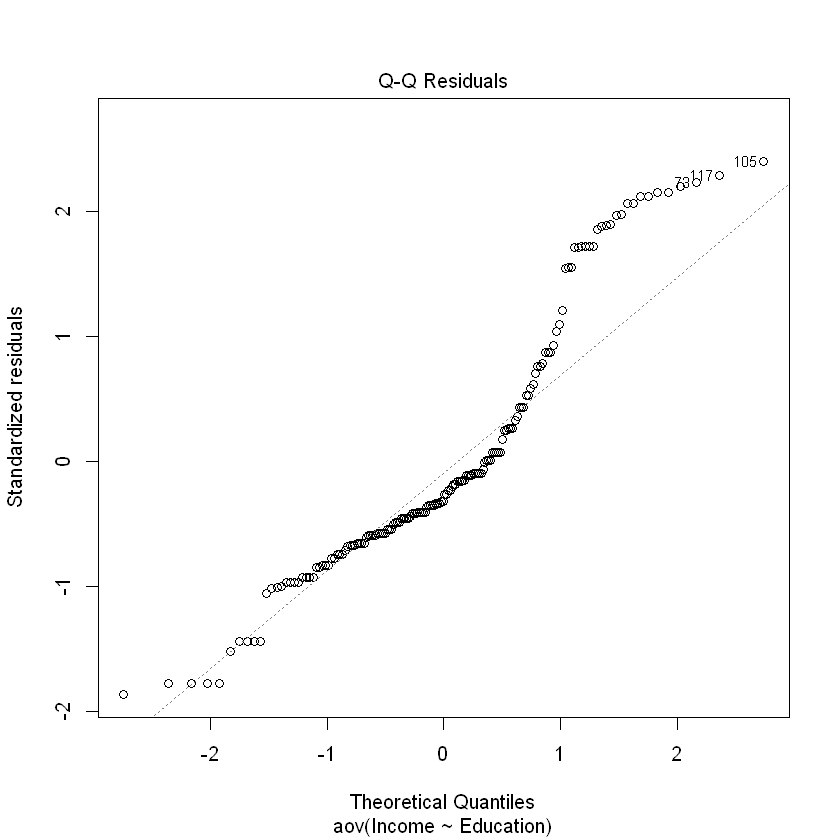

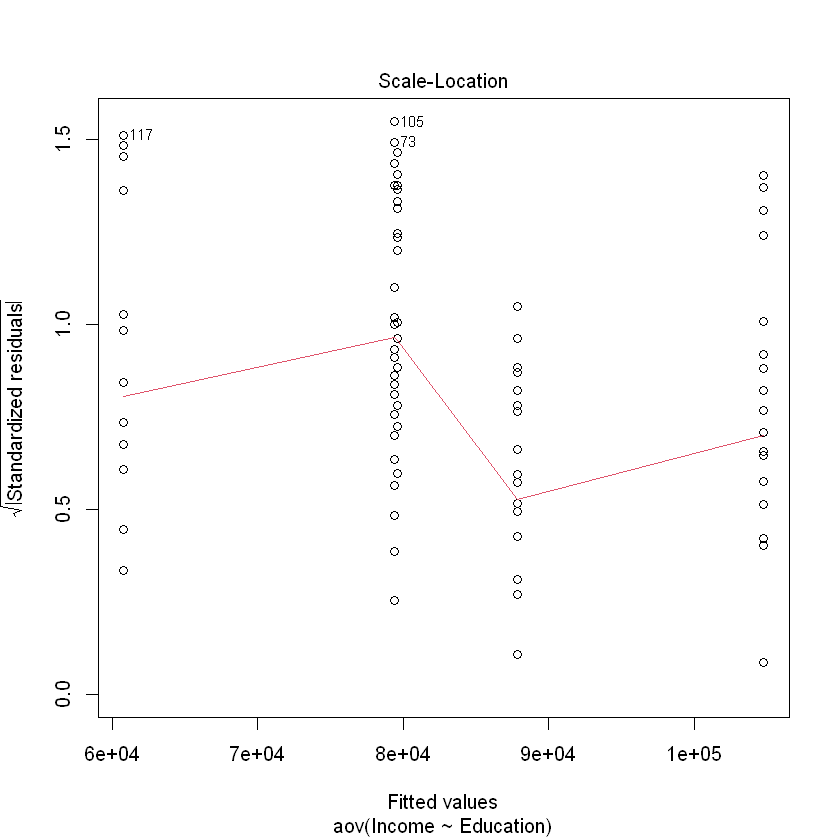

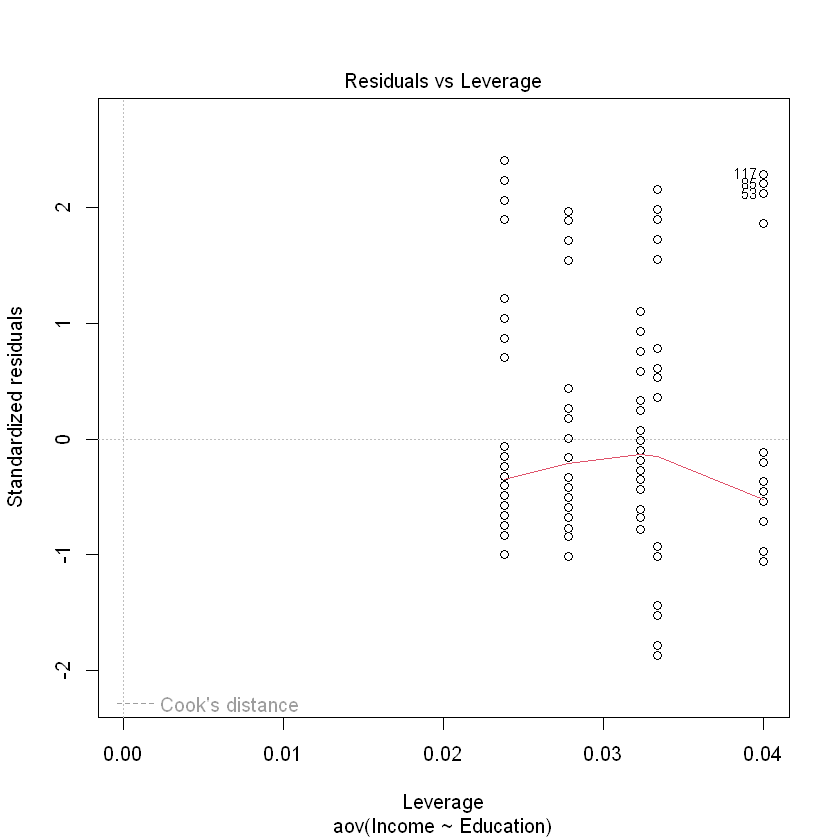

In [20]:
plot(mod1)

In [21]:
lm1 = lm(Income ~ Education, data = imputed)
summary(lm1)


Call:
lm(formula = Income ~ Education, data = imputed)

Residuals:
   Min     1Q Median     3Q    Max 
-54583 -18230  -8622  12722  70595 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)          60800       5952  10.216  < 2e-16 ***
EducationBachelor    18605       7517   2.475 0.014372 *  
EducationDoc         27039       7999   3.380 0.000911 ***
EducationHSD         18783       8058   2.331 0.021015 *  
EducationMaster      43978       7747   5.677 6.36e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 29760 on 159 degrees of freedom
Multiple R-squared:  0.1801,	Adjusted R-squared:  0.1594 
F-statistic: 8.729 on 4 and 159 DF,  p-value: 2.144e-06


In [22]:
summary(mod1)

             Df    Sum Sq   Mean Sq F value   Pr(>F)    
Education     4 3.092e+10 7.729e+09   8.729 2.14e-06 ***
Residuals   159 1.408e+11 8.855e+08                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## 4. Аналіз контрастів

In [23]:
lsmeans(lm1, ~ Education, adjust="scheffe") 


 Education lsmean   SE  df lower.CL upper.CL
 AD         60800 5952 159    40745    80855
 Bachelor   79405 4592 159    63932    94878
 Doc        87839 5345 159    69829   105849
 HSD        79583 5433 159    61276    97891
 Master    104778 4960 159    88065   121490

Confidence level used: 0.95 
Conf-level adjustment: scheffe method with rank 5 

In [24]:
marginal.means =lsmeans(lm1, ~ Education)
contrast(marginal.means)

 contrast        estimate   SE  df t.ratio p.value
 AD effect         -21681 5179 159  -4.186  0.0001
 Bachelor effect    -3076 4268 159  -0.721  0.5490
 Doc effect          5358 4765 159   1.124  0.4376
 HSD effect         -2898 4825 159  -0.601  0.5490
 Master effect      22297 4508 159   4.946  <.0001

P value adjustment: fdr method for 5 tests 

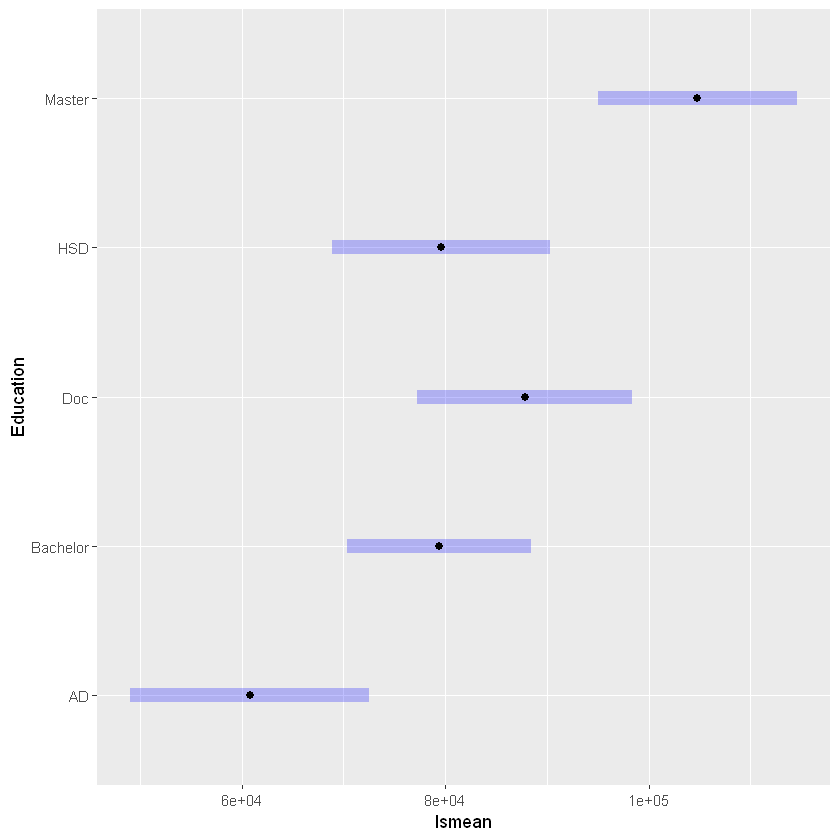

In [25]:
plot(marginal.means)

In [26]:
pairs(lsmeans(lm1, ~ Education))

 contrast          estimate   SE  df t.ratio p.value
 AD - Bachelor       -18605 7517 159  -2.475  0.1016
 AD - Doc            -27039 7999 159  -3.380  0.0080
 AD - HSD            -18783 8058 159  -2.331  0.1406
 AD - Master         -43978 7747 159  -5.677  <.0001
 Bachelor - Doc       -8434 7046 159  -1.197  0.7531
 Bachelor - HSD        -179 7113 159  -0.025  1.0000
 Bachelor - Master   -25373 6759 159  -3.754  0.0022
 Doc - HSD             8255 7621 159   1.083  0.8150
 Doc - Master        -16939 7291 159  -2.323  0.1430
 HSD - Master        -25194 7356 159  -3.425  0.0069

P value adjustment: tukey method for comparing a family of 5 estimates 

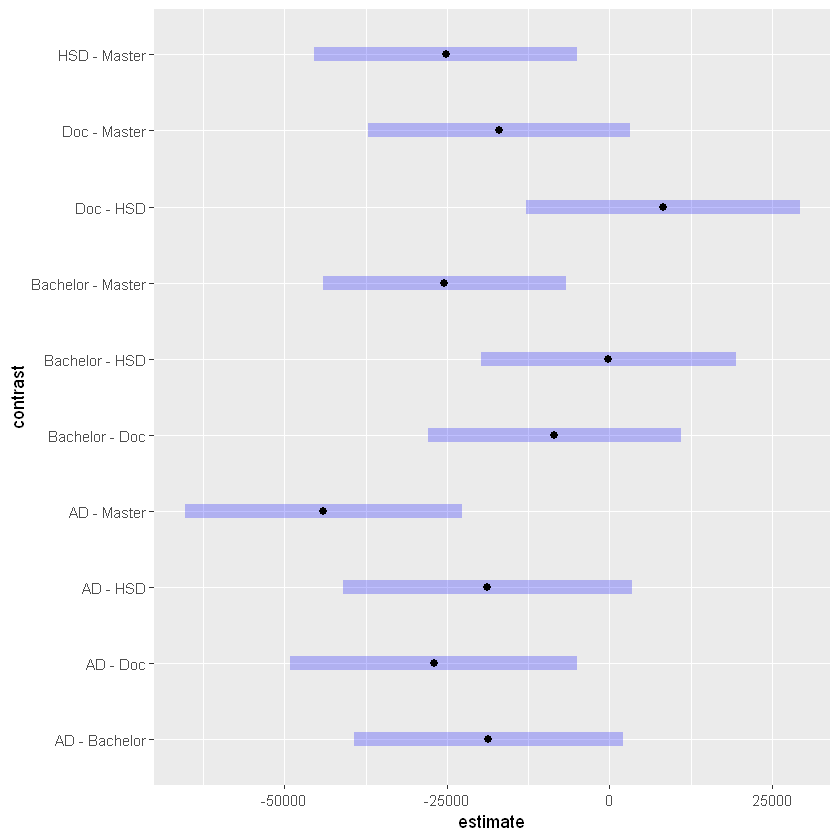

In [27]:
plot(pairs(lsmeans(lm1, ~ Education)))

In [84]:
# Specify custom contrasts
custom_contrasts <- list(
  "Bachelor's vs. High School and Doc" = c(0, 2, -1, -1,0),
  "Master's vs. High School and AD" = c(-1, 0, 0, -1, 2),
    "High School vs Masters and Doc" = c(0, 0, -1, 2, -1)
)

custom_contrast_result <- contrast(lsmeans(lm1, ~ Education),custom_contrasts)

# Print the custom contrast results
custom_contrast_result


 contrast                           estimate    SE  df t.ratio p.value
 Bachelor's vs. High School and Doc    -8613 11934 159  -0.722  0.4715
 Master's vs. High School and AD       69172 12780 159   5.412  <.0001
 High School vs Masters and Doc       -33450 13086 159  -2.556  0.0115
